In [88]:
# geopandas 사용해서 지도에 시각화하기
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.3 MB/s eta 0:00:0000:0100:01


In [89]:
pip install --upgrade mapclassify

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

In [3]:
train_data1 = pd.read_excel("text_labeling_Validation.xlsx")
train_data2 = pd.read_excel("text_labeling_Training.xlsx")
train_data=pd.concat(objs=[train_data1,train_data2])

In [4]:
# 텍스트 파일 경로
file_path = 'ratings.txt'

# 텍스트 파일 읽기
with open(file_path, 'r') as file:
    text_data = file.read()

In [5]:
import pandas as pd
from io import StringIO

# 텍스트 데이터를 파일 객체로 변환
file_obj = StringIO(text_data)

# 데이터프레임 생성
train_data = pd.read_csv(file_obj, sep='\t')

In [6]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


# 데이터 전처리

## 여행에 미치다 페이지에서 국내 여행 게시글만 가져오기

In [7]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
201,65f9bf4f08bfcc46ca193606,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,NaN,NaN
202,65f9bf4f08bfcc46ca193607,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@shorokhofff,2018년 6월 22일
203,65f9bf4f08bfcc46ca193608,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@soye0114 여기 다니엘 뮤비 찍은곳인가???!!!,2018년 2월 24일
204,65f9bf5008bfcc46ca193609,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@h.a.ing 요기봐 ㅋㅋㅋㅋㅋㅋ,2018년 2월 8일
205,65f9bf5008bfcc46ca19360a,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@dal.hye 야 나 여기 가고싶어ㅠㅠㅠ,2018년 1월 28일
...,...,...,...,...,...,...,...,...
1152424,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
1152425,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
1152426,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
1152427,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 구석구석 페이지와 여행에 미치다 페이지에서 가져온 데이터 합치기

In [8]:
kto9suk9suk_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [9]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 어느 지역에 관한 표시

In [10]:
region_gw = ['강원도 ','강원 ','강원특별자치도 ','#강원','#강릉', '#고성', '#동해', '#삼척', '#속초', '#양구', '#양양', '#영월', '#원주', '#인제', '#정선', '#철원', '#춘천', '#태백', '#평창', '#홍천', '#화천', '#횡성']
region_gg = ['경기도 ','경기 ','#경기','#가평', '#고양', '#과천', '#광명', '#구리', '#군포', '#김포', '#남양주', '#동두천', '#부천', '#성남', '#수원', '#시흥', '#안산', '#안성', '#안양', '#양주', '#양평', '#여주', '#연천', '#오산', '#용인', '#의왕', '#의정부', '#이천', '#파주', '#평택', '#포천', '#하남', '#화성']
region_gn = ['경상남도 ','경남 ','#경남 ','#거제', '#거창', '#고성', '#김해', '#남해', '#밀양', '#사천', '#산청', '#양산', '#의령', '#진주', '#창녕', '#창원', '통영', '#하동', '#함안', '#함양', '#합천']
region_gb = ['경상북도 ','경북 ','#경북','#경산', '#경주', '#고령', '#구미', '#김천', '#문경', '#봉화', '#상주', '#성주', '#안동', '#영덕', '#영양', '#영주', '#영천', '#예천', '#울릉', '#울진', '#의성', '#청도', '#청송', '#칠곡', '#포항']
region_gj = ['광주광역시 ','광주 ','#광주','#광산']
region_dg = ['대구광역시 ','대구 ','#대구','#군위', '#달서', '#달성', '#수성']
region_dj = ['대전광역시 ','대전 ','#대전','#대덕',   '#유성']
region_sj = ['세종특별자치시 ','세종 ','#세종']
region_bs = ['부산특별시 ','부산 ','#부산', '#금정', '#기장',  '#동래', '#부산진', '#사상', '#사하',  '#수영', '#연제', '#영도',  '#해운대']
region_su = ['서울특별시 ','서울 ','#서울','#강남', '#강동', '#강북', '#관악', '#광진', '#구로', '#금천', '#노원', '#도봉', '#동대문', '#동작', '#마포', '#서대문', '#서초', '#성동', '#성북', '#송파', '#양천', '#영등포', '#용산', '#은평', '#종로',  '#중랑']
region_us = ['울산광역시 ', '울산 ','#울산', '#울주']
region_ic = ['인천광역시 ','인천 ','#인천','#강화', '#계양', '#남동',  '#미추홀', '#부평',  '#연수', '#옹진']
region_jn = ['전라남도 ','전남 ','#강진', '#전남','#고흥', '#곡성', '#광양', '#구례', '#나주', '#담양', '#목포', '#무안', '#보성', '#순천', '#신안', '#여수', '#영광', '#영암', '#완도', '#장성', '#장흥', '#진도', '#함평', '#해남', '#화순']
region_jb = ['전라북도 ','전북 ','#고창', '#전북','#군산', '#김제', '#남원', '#무주', '#부안', '#순창', '#완주', '#익산', '#임실', '#장수', '#전주', '#정읍', '#진안']
region_jj = ['제주특별자치도 ','제주 ','#서귀포', '#제주']
region_cn = ['충청남도 ','충남 ','#충남','#계룡', '#공주', '#금산', '#논산', '#당진', '#보령', '#부여', '#서산', '#서천', '#아산', '#예산', '#천안', '#청양', '#태안', '#홍성']
region_cb = ['충청북도 ','충북 ','#충북','#괴산', '#단양', '#보은', '#영동', '#옥천', '#음성', '#제천', '#증평', '#진천', '#청주', '#충주']

In [11]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('강원')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('경기')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('경남')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('광주')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('경북')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('세종')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('대구')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('대전')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('부산')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('서울')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('울산')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('인천')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('전남')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('전북')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('제주')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('충남')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('충북')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## 댓글에 관한 데이터와 제목에 관한 데이터 분류

In [12]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN,,
1,3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN,부산,부산
2,4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN,제주,#제주
3,7,65f99f8d08bfcc46ca193524,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,NaN,NaN,울산,"울산 , #울산"
4,11,65f99f8f08bfcc46ca193528,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,,qVtXCrTTIY,NaN,NaN,광주,"광주 , #광주"
...,...,...,...,...,...,...,...,...,...,...,...
5187,599013,662abcaaf231019cd5b60515,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,,C41qMeoBkpF,NaN,NaN,서울,"서울 , #서울"
5188,599038,662abe16f231019cd5b60b80,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,,C49-AnfBEhj,NaN,NaN,서울,"서울 , #서울"
5189,599137,662ada15f231019cd5b61622,"지친 일상으로부터 벗어날 수 있는 시간, 응봉산에서 🌙\n\n이번 한주도 수고한 여...",2024년 4월 19일,1530,,C58BRwIhdW4,NaN,NaN,서울,"서울 , #서울"
5190,599140,662af284f231019cd5b61861,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,NaN,NaN,경남,#거창


## 태그와 관련된 단어 제거

In [13]:
def split(text):
    clean_text = []
    for word in text.split():
        if word.startswith('@'):
            pass
        else:
            clean_text.append(word)
    return " ".join(clean_text)

In [14]:
df_sns_review.loc[:,'review_content'] = df_sns_review['review_content'].apply(split)
df_sns_review.query("review_content.str.contains('@')")

,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
390,459,65facb853d093f346325208f,경기도 #양평 세미원 에서 만난 싱그러운 초록 풍경! It's healing tim...,2014년 9월 9일,118,,stleS6TTAe,수경아 세미원이다!^@^ 우리가 걸어온 길...ㅎㅎ,2014년 9월 9일,경기,"경기도 , #양평"
578,690,65fbdbf9e60f7a9a412f0446,붉은빛과 푸른빛이 영롱하게 물 위로 쏟아져 내리는 여기는 대전 엑스포 다리! 견우직...,2014년 10월 23일,125,,ufCjFazTDs,ㅋㅋㅋㅋ #나도절절한사랑좀 ㅋㅋㅋㅋ@yoon.km,2014년 10월 23일,대전,"대전 , #대전"
673,811,65fbdc36e60f7a9a412f04bf,경산시장에서 만난 뜨끈하고 매콤한 어묵꼬치! 따뜻한 국물이 좋은걸 보니 겨울이 성큼...,2014년 11월 18일,145,,vh6aTcTTKr,아대박...@jammang_,2014년 11월 18일,경북,#경산
997,1230,65fd6a598cbcc379b4584772,길었던 연휴의 막바지. 새로운 한 주를 준비하며 여유로운 멋이 흐르는 충북 영동 월...,2015년 2월 22일,177,,zYx5axTTFt,저긴 아직도 미지의 세계.....ㅋㅋㅋㅋㅋㅋ@mis_7211,2015년 3월 23일,충북,"충북 , #영동"
1032,1275,65fe13048cbcc379b45855fa,갓 구워진 따끈따끈한 파이 냄새가 여기까지 전해지는 것 같지 않나요~? :) 이곳은...,2015년 3월 4일,135,,zzADJhTTC5,앗~!! 거두리.....@.@ 주말이 되면 거두리 카페거리에서 커피한잔 하고싶어지네...,2015년 3월 4일,강원,#춘천
...,...,...,...,...,...,...,...,...,...,...,...
591412,596575,662a3ea54a4fe5fadf3f78a5,“안 되는걸 되게 하면 되잖아요“ 그래서 우리는 눈오리 대신 흙오리를 만든답니다?\...,2024년 1월 19일,12.4만,,C2Q5szLhpdh,니@거덕,2024년 2월 22일,부산,"부산 , #부산"
591617,596780,662a3eb04a4fe5fadf3f7972,“안 되는걸 되게 하면 되잖아요“ 그래서 우리는 눈오리 대신 흙오리를 만든답니다?\...,2024년 1월 19일,12.4만,,C2Q5szLhpdh,아닠ㅋㅋㅋㅋㅋ@look_atme_mi,2024년 1월 19일,부산,"부산 , #부산"
592408,597581,662a4d9ef231019cd5b5d3fa,“내가 서울 좀 안다?” 주목👀 #광고\n나만 알고싶은 서울의 숨은 장소가 있다면?...,2024년 2월 8일,1934,,C3FYUTQBnWW,#관악구 #관악산연주대 가볍게 등산하기 너무 좋아요.❤️@jangyongseung4😍,2024년 2월 10일,서울,"#안산, 서울 , #서울, #서대문"
592685,597859,662a6853f231019cd5b5d7f8,이야 여기 컨셉 맛집이네 ㅋㅋㅋㅋㅋ👍\n\n세심한 부분까지 포인트 넘 잘 살린거 아...,2024년 2월 13일,6772,,C3SB6jMhp6m,우린이제 컨겝이아니라@정말 줌마들이 되가는,2024년 2월 15일,인천,"인천 , #인천"


## 형태소 분류

In [15]:
from konlpy.tag import Okt
okt = Okt()
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] in ['Adjective', 'Noun', 'Verb', 'Punctuation', 'KoreanParticle','Number']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [16]:
df_sns_review['review_clean_okt'] = df_sns_review['review_content'].apply(okt_clean)

In [17]:
train_data['document'] = train_data['document'].astype(str)

In [18]:
train_data['review_clean_okt'] = train_data['document'].apply(okt_clean)

In [19]:
df_sns_review = df_sns_review.query('review_clean_okt != ""')

In [20]:
df_sns_review = df_sns_review.reset_index()
df_sns_review = df_sns_review[['card_content','card_date','card_like','card_watch','review_content','review_date','region','review_clean_okt']]
df_sns_review

,card_content,card_date,card_like,card_watch,review_content,review_date,region,review_clean_okt
0,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,정말 아름다워요,2014년 7월 9일,,정말 아름답다
1,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,멋진 섬이네요,2014년 6월 24일,,멋지다 서다
2,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,저 말이 되고싶어요^^,2014년 7월 10일,제주,저 말 되다 ^^
3,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,Beautiful~,2014년 7월 10일,제주,~
4,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,울산,명산 도 3~4월 물이 빠지다 걸다 들다 갈다 수 있다 평상시 여행 하다 수 있다 섬 녜
...,...,...,...,...,...,...,...,...
395242,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,여기 가까?,2024년 4월 24일,경남,여기 가깝다 ?
395243,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,미츠바 좋습니당,2024년 4월 26일,서울,미츠바 좋다 습 니당다
395244,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,서울,오다 이제 곧 장미 공원 시즌
395245,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,서울,혹시 여기 가보다 사람 있다 ? 어디가 젤 좋다 추천 해주다 주다 ~


# 학습, 테스트, 검증 데이터 분류

In [21]:
train_feature = train_data['review_clean_okt']
train_target = train_data['label']

In [22]:
# train, test 나누기
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(train_feature, train_target, test_size=0.6, random_state=42)

# 벡터화하기

In [23]:
feature_train

100923    케빈 스 페이 시 , 줄리 앤 무어 .. 이름 당연하다 연기 말 하다 없다 원작 1...
117033                                      발화점 넘다 못 채 연소 .
179459                                         어이 아리마 셍 ㅎㅎㅎ
177925                                     미군 끄다 평점 높다 대세 ?
138125    결코 평점 9.83 짜다 리 절대 아니다 생각 하다 과 감히 1 점줌 ... 평점 ...
                                ...                        
119879                                      개다 리지 리지 마 변태 년
103694    지루하다 짜증나다 어지럽다 싱겁다 ... 재수 없다 불쾌하다 영화 .. 영화 부르다...
131932                         스크림 같다 영화 만들다 싶다 보다 택 없다 -_-
146867            제작비 탓 하다 빈약하다 각본 . 원작 살리다 채 이유 연결 되다 플롯 .
121958                                         재미없다 .......
Name: review_clean_okt, Length: 80000, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
feature_train = tfidfVectorizer.fit_transform(feature_train)
feature_train.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 00', '00 감독', ..., '힝힝 정말', '힣히히헤', '힣히히헤 헤헤'],
      dtype=object)

In [25]:
feature_test = tfidfVectorizer.transform(feature_test)

# 긍, 부정 분류 모델 선택하기
- 가장 높은 성능을 보인 SVC 선택

### randomforestclassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [84]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [85]:
target_train_predict = classification_topic.predict(feature_train)

In [86]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [87]:
target_test_predict = classification_topic.predict(feature_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### logisticRegression

In [89]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()

In [90]:
logisticRegression.fit(feature_train,target_train)

LogisticRegression()

In [91]:
target_train_predict = logisticRegression.predict(feature_train)

In [92]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     39869
           1       0.92      0.89      0.90     40131

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000



In [93]:
target_test_predict = logisticRegression.predict(feature_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     60131
           1       0.84      0.82      0.83     59869

    accuracy                           0.83    120000
   macro avg       0.83      0.83      0.83    120000
weighted avg       0.83      0.83      0.83    120000



### randomforestclassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [102]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [103]:
target_train_predict = classification_topic.predict(feature_train)

In [104]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39869
           1       0.98      1.00      0.99     40131

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000



In [105]:
target_test_predict = classification_topic.predict(feature_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     60131
           1       0.81      0.82      0.82     59869

    accuracy                           0.82    120000
   macro avg       0.82      0.82      0.82    120000
weighted avg       0.82      0.82      0.82    120000



### K-Nearest Neighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [108]:
knn.fit(feature_train, target_train)

KNeighborsClassifier()

In [109]:
target_train_predict = knn.predict(feature_train)

In [110]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     39869
           1       0.72      0.74      0.73     40131

    accuracy                           0.73     80000
   macro avg       0.73      0.73      0.73     80000
weighted avg       0.73      0.73      0.73     80000



In [111]:
target_test_predict = knn.predict(feature_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59     60131
           1       0.59      0.61      0.60     59869

    accuracy                           0.59    120000
   macro avg       0.59      0.59      0.59    120000
weighted avg       0.59      0.59      0.59    120000



### Support Vector Machine

In [26]:
from sklearn import svm
svm_model = svm.SVC()

In [27]:
svm_model.fit(feature_train, target_train)

SVC()

In [28]:
target_train_predict = svm_model.predict(feature_train)

In [29]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     39869
           1       0.97      0.98      0.97     40131

    accuracy                           0.97     80000
   macro avg       0.97      0.97      0.97     80000
weighted avg       0.97      0.97      0.97     80000



In [30]:
target_test_predict = svm_model.predict(feature_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     60131
           1       0.83      0.85      0.84     59869

    accuracy                           0.84    120000
   macro avg       0.84      0.84      0.84    120000
weighted avg       0.84      0.84      0.84    120000



# 인스타그램 댓글 데이터에 적용

In [32]:
features=tfidfVectorizer.transform(df_sns_review['review_clean_okt'])

In [33]:
df_sns_review['goodorbad'] = svm_model.predict(features)

In [35]:
df_sns_review['goodorbad'].value_counts()

goodorbad
1    217234
0    178013
Name: count, dtype: int64

In [51]:
review_good = pd.pivot_table(df_sns_review, index=['card_content','card_date','region','card_like','card_watch'],values='goodorbad',aggfunc='sum')
review_good = review_good.rename(columns={'goodorbad':'good_review'})

In [52]:
review_total = pd.pivot_table(df_sns_review, index=['card_content','card_date','region','card_like','card_watch'],values='goodorbad',aggfunc='count')
review_total = review_total.rename(columns={'goodorbad':'total_review'})

In [54]:
df_sns = pd.concat([review_total, review_good], axis=1)
df_sns = df_sns.reset_index()

In [59]:
df_sns['good_ratio'] = round(df_sns['good_review']/df_sns['total_review'],2)

In [60]:
df_sns

,card_content,card_date,region,card_like,card_watch,total_review,good_review,good_ratio
0,"""4박 5일간 제주 먹방투어로 20끼 넘게 먹으며 즐기고 왔어요.\n한 식당 한 식...",2020년 6월 15일,제주,,,202,99,0.49
1,"""너에게 난 해질녘 노을처럼\n한편의 아르...",2020년 6월 4일,,3764,,31,17,0.55
2,"""꿈과 희망의 원더랜드가 바로 여기🎉🎉\n\n#울산 #남구 옥상에는 공중관람차가 있...",2022년 1월 13일,울산,3424,,20,13,0.65
3,"""너 거기 가 #봄?"" #강원도 #삼척 #유채꽃축제 에서 발길 닿는 곳마다 노랗게 ...",2016년 4월 13일,강원,290,,4,2,0.50
4,"""너 거기 가 #봄?"" 300만 송이의 형형색색의 튤립이 펼쳐지있는 그 곳!\n백사...",2016년 4월 15일,전남,245,,2,2,1.00
...,...,...,...,...,...,...,...,...
4612,🧡능소화가 피었다고? 여름이었다🥵\n\n주중에 다시 비소식이 들려오길래 서울에서 가...,2022년 7월 4일,서울,2374,,34,25,0.74
4613,🧡요즘 열일 하는 서울하늘 노을.mov🧡\n\n날씨도 선선하니 저녁에 한강 가서 노...,2022년 5월 12일,서울,1969,,15,10,0.67
4614,"🧡💛💜베네치아와 닮은 모습의 알록달록 이색 풍경으로 한국의 베네치아, #부네치아 라...",2021년 2월 22일,부산,3857,,28,12,0.43
4615,🧥\n[제주도에 버버리가 떴다…💖]\n\n제주도 방주교회 근처에 버버리 전시장이 생...,2021년 11월 14일,제주,9939,,264,118,0.45


# 지역별, 계절별 긍정 댓글 비율 비교
- 지역별 게시물 당 긍정 댓글 비율을 비교해봤을 때 지역별 큰 차이가 없음
- 계절별로 비교했을 떄도 큰 차이가 없음

In [61]:
for i in range(len(df_sns)):
    df_sns.loc[i,'card_month'] = df_sns.loc[i,'card_date'].split()[1][:-1]
    if df_sns.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns.loc[i,'card_season'] = '봄'
    elif df_sns.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns.loc[i,'card_season']  = '여름'
    elif df_sns.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns.loc[i,'card_season']  = '가을'
    elif df_sns.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns.loc[i,'card_season'] = '겨울'


In [72]:
df_sns_20 = df_sns.query("total_review>=20")

In [206]:
korea.loc[korea['CTP_KOR_NM'] == '강원특별자치도', 'CTP_KOR_NM'] = '강원'
korea.loc[korea['CTP_KOR_NM'] == '경기도', 'CTP_KOR_NM'] = '경기'
korea.loc[korea['CTP_KOR_NM'] == '경상남도', 'CTP_KOR_NM'] = '경남'
korea.loc[korea['CTP_KOR_NM'] == '경상북도', 'CTP_KOR_NM'] = '경북'
korea.loc[korea['CTP_KOR_NM'] == '광주광역시', 'CTP_KOR_NM'] = '광주'
korea.loc[korea['CTP_KOR_NM'] == '대구광역시', 'CTP_KOR_NM'] = '대구'
korea.loc[korea['CTP_KOR_NM'] == '대전광역시', 'CTP_KOR_NM'] = '대전'
korea.loc[korea['CTP_KOR_NM'] == '부산광역시', 'CTP_KOR_NM'] = '부산'
korea.loc[korea['CTP_KOR_NM'] == '서울특별시', 'CTP_KOR_NM'] = '서울'
korea.loc[korea['CTP_KOR_NM'] == '세종특별자치시', 'CTP_KOR_NM'] = '세종'
korea.loc[korea['CTP_KOR_NM'] == '울산광역시', 'CTP_KOR_NM'] = '울산'
korea.loc[korea['CTP_KOR_NM'] == '인천광역시', 'CTP_KOR_NM'] = '인천'
korea.loc[korea['CTP_KOR_NM'] == '전라남도', 'CTP_KOR_NM'] = '전남'
korea.loc[korea['CTP_KOR_NM'] == '전라북도', 'CTP_KOR_NM'] = '전북'
korea.loc[korea['CTP_KOR_NM'] == '제주특별자치도', 'CTP_KOR_NM'] = '제주'
korea.loc[korea['CTP_KOR_NM'] == '충청남도', 'CTP_KOR_NM'] = '충남'
korea.loc[korea['CTP_KOR_NM'] == '충청북도', 'CTP_KOR_NM'] = '충북'


In [238]:
# pivot_review_good = pd.pivot_table(df_sns_20,index='region',columns='card_season',values='good_ratio',aggfunc='mean')
pivot_review_good = pd.pivot_table(df_sns_20,index='region',values='good_ratio',aggfunc='mean')
pivot_review_good = pivot_review_good.loc['강원':]
# pivot_review_good = pivot_review_good.loc['강원':,['봄','여름','가을','겨울']]
pivot_review_good = pivot_review_good.fillna(0)
pivot_review_good['good_ratio'] = pivot_review_good['good_ratio']*100

In [234]:
pivot_review_good = pivot_review_good.sort_values("good_ratio",ascending = False)

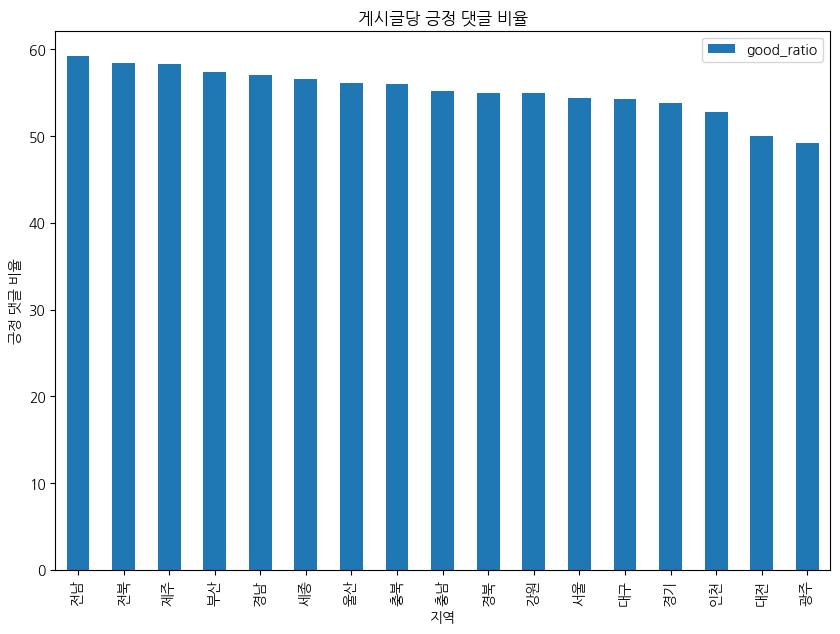

In [235]:
# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = pivot_review_good.plot(kind='bar',  figsize=(10, 7))
plt.title('게시글당 긍정 댓글 비율')
plt.xlabel('지역')
plt.ylabel('긍정 댓글 비율')

# 그래프 표시
plt.show()

In [239]:
pivot_review_good_map = pd.merge(korea, pivot_review_good, left_on='CTP_KOR_NM', right_on='region', how='left')
pivot_review_good_map

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,good_ratio
0,11,Seoul,서울,"POLYGON ((966987.226 1941110.946, 966987.119 1...",54.340659
1,26,Busan,부산,"MULTIPOLYGON (((1148194.981 1685460.055, 11481...",57.432927
2,27,Daegu,대구,"POLYGON ((1087859.999 1760097.461, 1087859.951...",54.291667
3,28,Incheon,인천,"MULTIPOLYGON (((847834.755 1881816.658, 847840...",52.755102
4,29,Gwangju,광주,"POLYGON ((932712.687 1696168.692, 932781.680 1...",49.200000
5,30,Daejeon,대전,"POLYGON ((990946.725 1832389.260, 991057.692 1...",50.055556
6,31,Ulsan,울산,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",56.076923
7,36,Sejong-si,세종,"POLYGON ((971235.936 1844386.985, 971234.055 1...",56.600000
8,41,Gyeonggi-do,경기,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",53.795918
9,43,Chungcheongbuk-do,충북,"POLYGON ((1042689.435 1917662.690, 1042731.339...",56.044776


In [241]:
# # 발생자수에 따라 정규화

# # Matplotlib Figure 객체 생성
# fig, ax = plt.subplots(figsize=(12, 10))  # 크기를 조정하여 지도를 키웁니다.


# # 지도 시각화
# pivot_review_good_map.plot(ax=ax, column="good_ratio", legend=True, scheme='jenkscaspall', cmap="Greens", k=8)
# for idx, row in pivot_review_good_map.iterrows():
#     ax.annotate(row['CTP_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='left', fontsize=14, color='black')
# ax.set_title("대한민국 지역별 게시글당 댓글 수")
# ax.axis('off')  # 축을 가리기 위해 축의 가시성을 비활성화합니다.
# plt.show()

In [245]:
pivot_review_good_season = pd.pivot_table(df_sns_20,index='region',columns='card_season',values='good_ratio',aggfunc='mean')
pivot_review_good_season = pivot_review_good_season.loc['강원':,['봄','여름','가을','겨울']]
pivot_review_good_season = pivot_review_good_season.fillna(0)
pivot_review_good_season

card_season,봄,여름,가을,겨울
region,,,,
강원,0.542963,0.545039,0.537969,0.574776
경기,0.532195,0.523770,0.559245,0.537317
경남,0.566447,0.565811,0.575538,0.578621
경북,0.551642,0.543692,0.565303,0.531351
광주,0.475000,0.546667,0.430000,0.000000
대구,0.570000,0.528667,0.505714,0.512500
대전,0.000000,0.507143,0.496364,0.000000
부산,0.560625,0.569796,0.562500,0.605385
서울,0.522947,0.557978,0.550288,0.542500


# 댓글 키워드 분석

In [366]:
stopwords = ['언니','응모','오빠','여보','엄마','아빠','갈래','아보','띠용','광한루원','우도','갈사','오오','보이','일이','호오','가조','타자','태그','대신','가보','참여','완료','다음','와우','제발','완전','나중','대신','대박','실화','내년','가요','가능','저장','여행','여행가','이번','고고','아아','저번','요즘','주가','해원','영원','기기','그때','오우','야야','모야','건가','가지','정도','군위']
list_region = ['거제도','강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북','강릉','고성','동해','삼척','속초','양구','양양','영월','원주','인제','정선','철원','춘천','태백','평창','홍천','화천','횡성','가평','고양','과천','광명','광주','구리','군포','김포','남양주','동두천','부천','성남','수원','시흥','안산','안성','안양','양주','양평','여주','연천','오산','용인','의왕','의정부','이천','파주','평택','포천','하남','화성','거제','거창','고성','김해','남해','밀양','사천','산청','양산','의령','진주','창녕','창원','통영','하동','함안','함양','합천','경산','경주','고령','구미','김천','문경','봉화','상주','성주','안동','영덕','영양','영주','영천','예천','울릉','울진','의성','청도','청송','칠곡','포항','광산','남구','동구','북구','서구','군위','남구','달서','달성','동구','북구','서구','수성','중구','대덕','동구','서구','유성','중구','강서','금정','기장','남구','동구','동래','부산진','북구','사상','사하','서구','수영','연제','영도','중구','해운대','강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문','서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑','남구','동구','북구','울주','중구','강화','계양','남동','동구','미추홀','부평','서구','연수','옹진','중구','강진','고흥','곡성','광양','구례','나주시','담양','목포','무안','보성','순천','신안','여수','영광','영암','완도','장성','장흥','진도','함평','해남','화순','고창','군산','김제','남원','무주','부안','순창','완주','익산','임실','장수','전주','정읍','진안','서귀포','제주','계룡','공주','금산','논산','당진','보령','부여','서산','서천','아산','예산','천안','청양','태안','홍성','괴산','단양','보은','영동','옥천','음성','제천','증평','진천','청주','충주']
stopwords.extend(list_region) 

In [314]:
# 토크나이징 함수 정의

from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                word_list.append(word)
    return " ".join(word_list)

In [315]:
df_sns_review.loc[:,'review_keyword']=df_sns_review['review_content'].apply(Tokenizer)

In [326]:
df_sns_review_keyword = df_sns_review.query("review_keyword !=''")

In [356]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.6,min_df=0.001,ngram_range=(1,2))
features = tfidfVectorizer.fit_transform(df_sns_review_keyword['review_keyword'])
features.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['가게', '가격', '가구', '가나', '가세', '가시', '가용', '가을', '가족', '간곳', '갈수',
       '감사', '감성', '거리', '게시', '겨울', '경복궁', '경치', '계단', '계속', '계절', '계정',
       '계획', '고기', '고향', '공간', '공부', '공사', '공원', '공원 공원', '관광', '광안',
       '구경', '구석구석', '구함', '국내', '그림', '근처', '기간', '기대', '기도', '기분', '기억',
       '기전', '기차', '기회', '길이', '나라', '나무', '나이', '난리', '날씨', '낭만', '내일',
       '노래', '노을', '녹차', '누나', '느낌', '다대', '다리', '다음주', '단풍', '닭갈비',
       '당일치기', '당장', '당첨', '대리', '대체', '대하', '댓글', '덕분', '덕수궁', '데이지',
       '데이트', '도로', '도시', '도전', '동굴', '동네', '동화', '드라이브', '등산', '라면',
       '라벤더', '랜드', '로망', '마을', '마음', '마지막', '맛집', '매력', '매화', '맥주', '메모',
       '면허', '명동', '명소', '모두', '모습', '무료', '문화', '물놀이', '물이', '미래', '바람',
       '바위', '방문', '배경', '버스', '벚꽃', '보라', '보장', '보정', '부탁', '분위기', '불꽃',
       '비행기', '사람', '사랑', '사막', '사실', '사용', '사진', '산이', '산책', '삼각대', '새우',
       '새해', '색감', '색깔', '생각', '생일', '서핑', '선물', '선생님', '세상', '소개', '소리',
       '소통', '송도', '수국', '숙소', '순간', '스타일', '스토어', '스

In [367]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_10 = LatentDirichletAllocation(n_components=4, random_state=36) #인스턴스화 #n_components 토픽의 갯수
lda_model_10.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:20])# 시리즈 형식으로 출력 get values from series / index 
    topics_list.append(topics_text)
topics_list_add_10 = [['Topic1', 'Topic2','Topic3','Topic4'],topics_list]
df_topics_keywords_10 = pd.DataFrame(topics_list_add_10)
df_topics_keywords_10=df_topics_keywords_10.T
df_topics_keywords_10

,0,1
0,Topic1,사람 등산 겨울 준비 시간 주말 맛집 날씨 최고 기억 캠핑 휴가 하늘 라면 운전 야경 혼자 당장 마지막 자연
1,Topic2,생각 참고 공원 구경 컨셉 친구 노을 내일 인생 사랑 서핑 인스타 그림 드라이브 유채꽃 누나 댓글 평일 간곳 토요일
2,Topic3,도전 힐링 여름 오늘 풍경 기도 세상 수국 근처 숙소 하루 동네 고향 마을 정보 이유 데이트 작년 투어 마음
3,Topic4,사진 가을 느낌 벚꽃 지금 추억 영상 코스 올해 추천 어제 분위기 메모 예약 단풍 장소 가구 여행지 카메라 자전거


In [368]:
import pyLDAvis
import pyLDAvis.lda_model
vis_10 = pyLDAvis.lda_model.prepare(lda_model_10,features,tfidfVectorizer)
vis_10
pyLDAvis.enable_notebook()
components_10_display = pyLDAvis.display(vis_10)
components_10_display

In [369]:
df_good = df_sns_review.query("goodorbad == 1")
features_good = tfidfVectorizer.transform(df_good['review_keyword'])
df_bad = df_sns_review.query("goodorbad == 0")
features_bad = tfidfVectorizer.transform(df_bad['review_keyword'])


In [370]:
topics_output = lda_model_10.transform(features)
df_topics_score = pd.DataFrame(topics_output)
df_topics_score['dominant_topic_number']=np.argmax(topics_output, axis=1)
df_topics_score['dominant_topic_number'].value_counts()

dominant_topic_number
0    87205
3    23238
2    20753
1    17053
Name: count, dtype: int64

In [371]:
df_sns_review_keyword.loc[:,'review_topic'] = df_topics_score['dominant_topic_number']

In [364]:
df_sns_review_keyword.query("review_topic == 0")

,card_content,card_date,card_like,card_watch,review_content,review_date,region,review_clean_okt,goodorbad,review_keyword,review_topic
4,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 넋을 잃습니다~\n\n#울산 #명선도 #섬여행\n#Ulsan #Myungsundo,2014년 7월 11일,58,,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은 아녜요,2014년 8월 5일,울산,명산 도 3~4월 물이 빠지다 걸다 들다 갈다 수 있다 평상시 여행 하다 수 있다 섬 녜,1,명산 물이 평상시,0.0
7,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된 걸음도 즐거울 것 같습니다\n\n#광주 #무등산 #시무지기폭포\n#Gwangju #Mudeungsan #Waterfall,2014년 7월 12일,39,,무등산에 이런 폭포가 있는 줄 몰랐네요,2014년 7월 26일,광주,무등산 이렇다 폭포 있다 줄 모르다,0,폭포,0.0
9,얼음같이 차고 맑은 물과 빽빽이 들어선 나무 숲길\n제주 서귀포 돈내코계곡의 시원한 물줄기로 마음까지 시원하게~\n\n#제주 #서귀포 #돈내코계곡\n#Jeju #Seogwipo #Donnaeko #Valley,2014년 7월 13일,43,,다이빙하면 시원하겠어요~,2014년 8월 14일,제주,다이빙 하다 시원하다 ~,1,다이빙,0.0
11,햇살 아래 반짝이는 풋풋한 청보리의 물결\n바람에 넘실대는 싱그러운 초록빛~♡ #고창 #고창보리밭 #고창청보리밭 #청보리축제\n#Jeollabuk_do #Gochang #GreenBarleyFestival #GoChangGreenBarleyFestival #Korea #Nature #View,2014년 7월 14일,57,,보리는 수확철이 지났는데...,2014년 7월 14일,전북,보리 수확 철 지나다 ...,0,보리 수확,0.0
14,"진한 육수, 시원한 동치미 국물, 쭉쭉 찢은 닭고기 +_+\n갖가지 야채와 살얼음 동동 띄워 한 입 먹으면 더위가 싸악~! #먹스타그램 #경기도 #파주 #초계탕 #여름별미 #별미\n#Korea #picoftheday #Koreanfood #Food #Summer",2014년 7월 16일,33,,얼음이 동동 시원해보여요~,2014년 8월 14일,경기,얼음 동동 시원 해보다 ~,1,얼음 동동,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148239,.\n속초의 한 호텔 조식당 뷰 ⛰\n오늘의 메뉴는 설악산입니다 🍳\n.\n#스위스_아니고_속초_대한민국!\n.\n.\n@travelholic_insta\n#여행에미치다 #속초 #설악산 #한국 #국내여행\n#Korea #Sokcho #Gangwondo #Alps #Travelholic,2019년 6월 30일,1.4만,,나의 최애 강원도♥️,2019년 6월 30일,강원,나 최애 강원도,0,최애,0.0
148240,.\n속초의 한 호텔 조식당 뷰 ⛰\n오늘의 메뉴는 설악산입니다 🍳\n.\n#스위스_아니고_속초_대한민국!\n.\n.\n@travelholic_insta\n#여행에미치다 #속초 #설악산 #한국 #국내여행\n#Korea #Sokcho #Gangwondo #Alps #Travelholic,2019년 6월 30일,1.4만,,나 첫번째사진 아버님인줄ㅋㅋㅋㅋㅋㅋㅋ,2019년 6월 30일,강원,나 첫 사진 아버님 줄 ㅋㅋㅋㅋㅋㅋㅋ,0,사진 아버님,0.0
148241,.\n속초의 한 호텔 조식당 뷰 ⛰\n오늘의 메뉴는 설악산입니다 🍳\n.\n#스위스_아니고_속초_대한민국!\n.\n.\n@travelholic_insta\n#여행에미치다 #속초 #설악산 #한국 #국내여행\n#Korea #Sokcho #Gangwondo #Alps #Travelholic,2019년 6월 30일,1.4만,,"야 메모해둬 켄싱,ㅓㅋ스타호텔",2019년 6월 30일,강원,"메모 하다 두다 켄싱 , ㅓㅋ 스타 호텔",0,메모 스타 호텔,0.0
148242,.\n속초의 한 호텔 조식당 뷰 ⛰\n오늘의 메뉴는 설악산입니다 🍳\n.\n#스위스_아니고_속초_대한민국!\n.\n.\n@travelholic_insta\n#여행에미치다 #속초 #설악산 #한국 #국내여행\n#Korea #Sokcho #Gangwondo #Alps #Travelholic,2019년 6월 30일,1.4만,,우와 외국같당 속초갈까?~~~,2019년 6월 30일,강원,외국 같다 속초 갈다 ?~~~,0,외국,0.0


# 결론
1. 영화 리뷰를 감성 분석한 데이터를 학습시켜 만든 모델을 통해 인스타그램 댓글의 감성분석을 진행하였지만, 긍정 데이터를 부정 데이터로 인식하는 경우가 많았음
    - 인스타그램 댓글에 은어가 많이 포함되어 있고, 모델에 학습시킨 데이터와 실제 적용한 데이터의 주제가 다르기 때문에 이러한 결과가 나온 것으로 보임
2. 인스타그램 댓글에 어떤 키워드가 많이 등장하는지 LDA를 통해 토픽별로 분류하고자 하였지만, 분류된 토픽들이 실제로 해당 문장을 표현하지 못하는 경우가 많았음
    - 인스타그램 댓글의 길이가 길지 않아, 해당 댓글로 토픽을 분류하기에는 어려움이 있는 것으로 보임